# 1.0 Dependencies

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

# 2.0 Defining functions and default figuresize parameters

In [83]:
plt.rcParams['figure.figsize'] = [10, 5]

In [84]:
def ecdf(data):
    """Generates an empirical cummulative distribution function for data"""
    
    # Calculate the number of observations
    n=len(data)
    
    # Calculate the x data
    x=np.sort(data)
    
    # Calculate an evenly distributed y axis and divide by the length to make it a percentage
    # n+1 because the end value is not inclusive
    # Note: its 'np.arange' and not np.arrange()
    y=np.arange(1,n+1)/n
    
    return x,y

# 3.0 Load the data

In [85]:
from sklearn.datasets import load_iris

Check out victor Tong's answer from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset on how to load this data into a pd.dataframe

In [86]:
#converting the data into a dataframe
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

#adding categorical data
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#creating versicolor dataframe
#here we use a boolean variable to filter the whole dataframe
versicolor=df[df['species']=='versicolor']
#and then slice the dataframe for the petal length
versicolor_petal_length=versicolor['petal length (cm)']
versicolor_petal_width=versicolor['petal width (cm)']

virginica=df[df['species']=='virginica']
#and then slice the dataframe for the petal length
virginica_petal_length=virginica['petal length (cm)']

setosa=df[df['species']=='setosa']
#and then slice the dataframe for the petal length
setosa_petal_length=setosa['petal length (cm)']
setosa_petal_length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64

In [87]:
#set the plotting style
sns.set()

# 4.0 Summary Statistics

## 4.1 Computing the mean and median

In [88]:
mean_length_vers= np.mean(versicolor_petal_length)
median_length_vers= np.median(versicolor_petal_length)
# Print the result with some nice formatting
print('Mean of versicolor:', mean_length_vers, 'cm')
print('Median of versicolor:', median_length_vers, 'cm')
print('mean/median %:', np.round(mean_length_vers/median_length_vers*100))

Mean of versicolor: 4.26 cm
Median of versicolor: 4.35 cm
mean/median %: 98.0


In the case the mean and the median are close, however they are not the same which could indicate that the mean is affected by outliers, the distribution is asymmetric ("Skewed left of right" or has a "tail")

## 4.2 Percentiles, outliers, and box plots

In [89]:
#calculating the percentiles of versicolor_petal_length at the defined percentiles "percentiles"
percentiles=np.array([2.5,25,50,75,97.5])
v_percentiles=np.percentile(versicolor_petal_length,percentiles)
v_percentiles

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### 4.2.1 Comparing percentiles to the ECDF

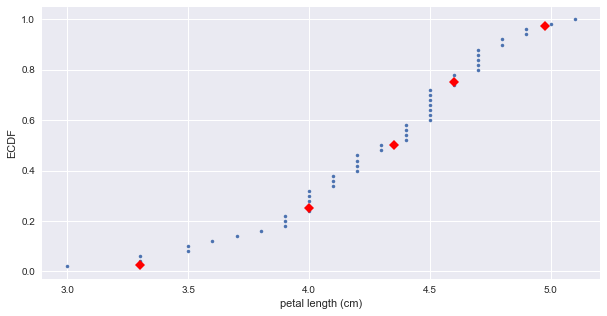

In [90]:
# use ecdf function to create edfc data
x_vers, y_vers=ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
# percentiles/100 because you need to scale the percentiles to the same scale as the y-axis
_ = plt.plot(v_percentiles, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### 4.2.2 Box plots

C:\Users\keaga\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


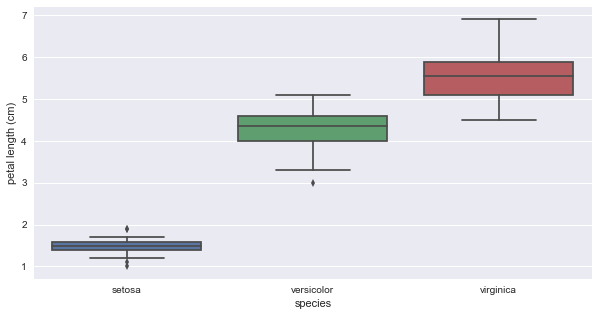

In [91]:
# Create box plot with Seaborn's default settings
_=sns.boxplot(x='species',y='petal length (cm)',data=df)

# Label the axes
_ = plt.xlabel('species')

_ = plt.ylabel('petal length (cm)')


# Show the plot
plt.show()

## 4.3 Variance and standard deviation

Variance: the Mean of the squared distances of each of data from the data's mean (An informal measure of a data spread)  

In [92]:
np.var(versicolor_petal_length)

0.21640000000000012

The standard deviation is the square root of the variance, we can calculate this directly or by sqrting the result

In [93]:
np.std(versicolor_petal_length)

0.4651881339845204

In [94]:
np.sqrt(np.var(versicolor_petal_length))

0.4651881339845204

Calculating the varience manually:  
 * Create an array of differences between data to the mean  
 * Square the differences  
 * Compute the mean of these squares  
 * Check how correct by using np.var  

In [95]:
diff_array=versicolor_petal_length-np.mean(versicolor_petal_length)

In [96]:
sqr=diff_array**2

In [97]:
variance_manual=np.mean(sqr)
variance_numpy=np.var(versicolor_petal_length)
print(variance_manual,variance_numpy)

0.21640000000000012 0.21640000000000012


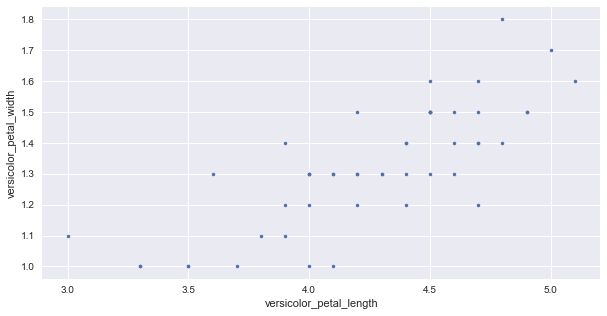

In [98]:
# Make a scatter plot
_=plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')


# Show the result
plt.show()

## 4.4 Covariance

Covariance is a measure of the joint variability of two random variables  

The sign of the covariance shows the tendency in the linear relationship between the variables

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables

In [99]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


Directly from the datacamp tutorial "np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance."  
https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=14

# 5.0 Pearson correlation coefficient

The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation

* rho= Pearson correlation coefficient = covariance_xy /(std_x*std_y)
* rho=variability due to codependence / independent variability

In [100]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [101]:
# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(np.round(r,2))

0.79
